#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [85]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

In [86]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

$PATH


In [87]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [88]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open(r"C:\Users\merov\OneDrive\Desktop\VSCODE\Big_Data_Analysis\B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [89]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [90]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

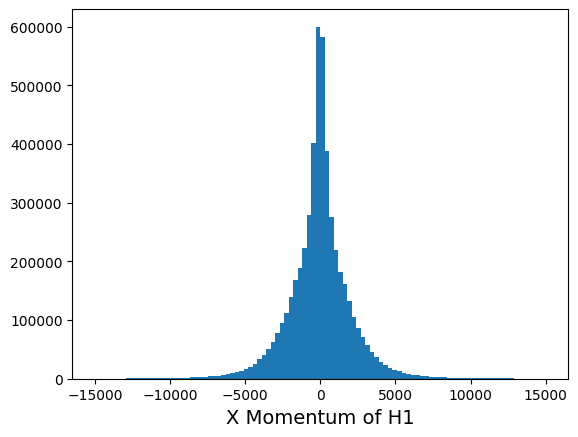

In [91]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

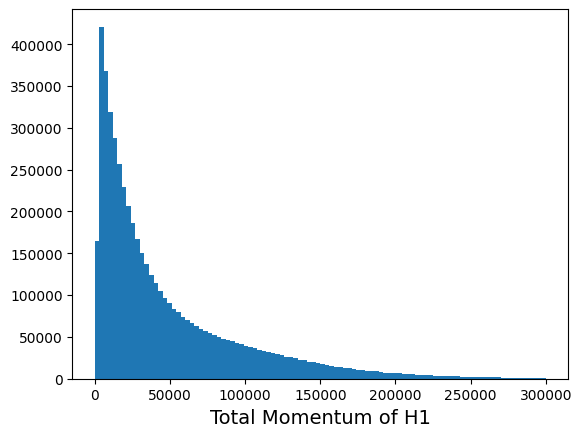

In [92]:
import numpy as np
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot= np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)

# then here you can plot something (remember to adjust the range)
plt.figure();
plt.hist (H1_Ptot, bins=100, range=(0,300000));
plt.xlabel('Total Momentum of H1', fontsize=14);


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

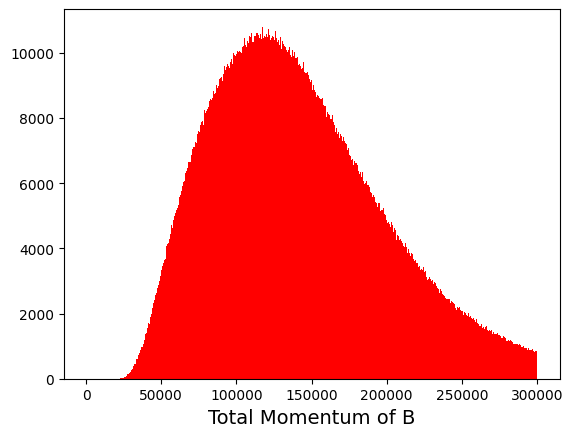

In [93]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()



H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()

H2_Ptot= np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)
H3_Ptot= np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)


PX=H1_PX+H2_PX+H3_PX 
PY=H1_PY+H2_PY+H3_PY
PZ=H1_PZ+H2_PZ+H3_PZ
B_Ptot= np.sqrt(PX**2 + PY**2 + PZ**2)


plt.figure();
plt.hist (B_Ptot, bins=1000, range=(0,300000), color='r');
plt.xlabel('Total Momentum of B', fontsize=14);


So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [ ]:
# lets load the data in a slightly different way:
# taking the decay tree andd just make it an array 
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print ("%s  :  %s" % (branch, value))

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [ ]:
#we do the maths here.
H1_E=np.sqrt(H1_Ptot**2+493.7**2)
H2_E=np.sqrt(H2_Ptot**2+493.7**2)
H3_E=np.sqrt(H3_Ptot**2+493.7**2)

print("Energy of H1_E at event 45 is: ", H1_E[45], "MeV")	
print("Energy of H2_E at event 45 is: ", H2_E[45], "MeV")
print("Energy of H3_E at event 45 is: ", H3_E[45],  "MeV") 

Energy of H1_E at event 45 is:  5920.420570364912 MeV
Energy of H2_E at event 45 is:  35364.956230286785 MeV
Energy of H3_E at event 45 is:  277347.5294123928 MeV


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

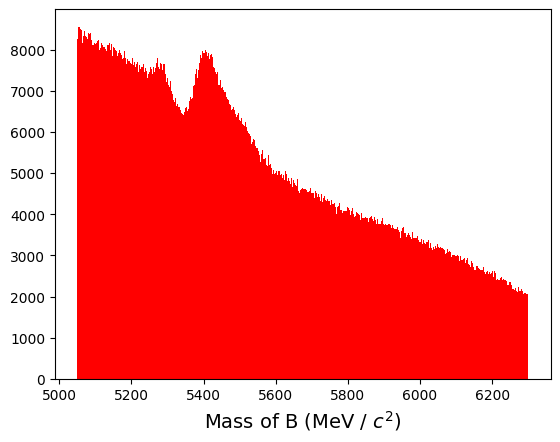

In [96]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters
B_E=H1_E+H2_E+H3_E
c = 299800000

MassB=np.sqrt(B_E**2-B_Ptot**2)
#Now plot a histogram of the range of masses of the B meson.
plt.figure();
plt.hist (MassB , bins=1000 , color='r');
plt.xlabel('Mass of B (MeV / $c^2$)', fontsize=14);

#Does this match what we would expect from theory?

#Hint - look it up

*ADDED BY STUDENT: * This is not filtered yet, but there seems to be a small peak at around 5280 MEV/c^2 which is close to the Wikipedia value of 5279.

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

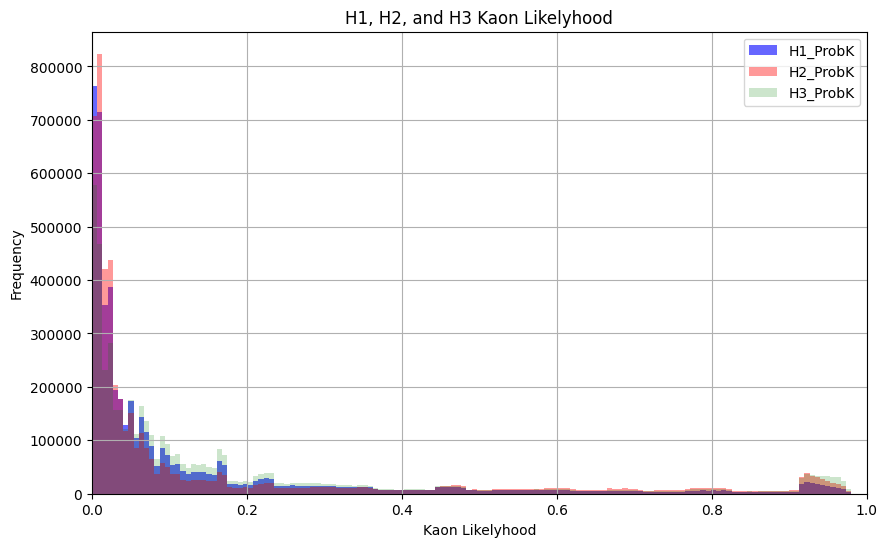

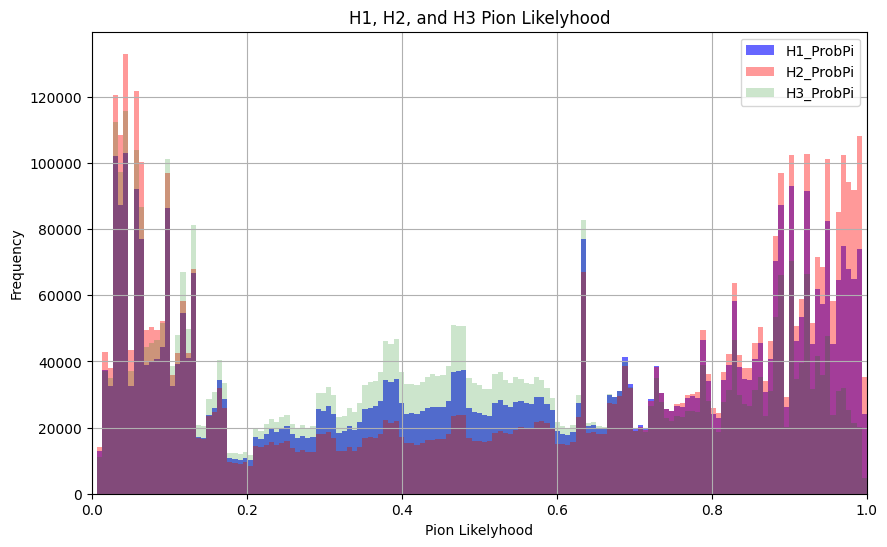

C:\Users\merov\AppData\Local\Temp\ipykernel_28056\2362405138.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


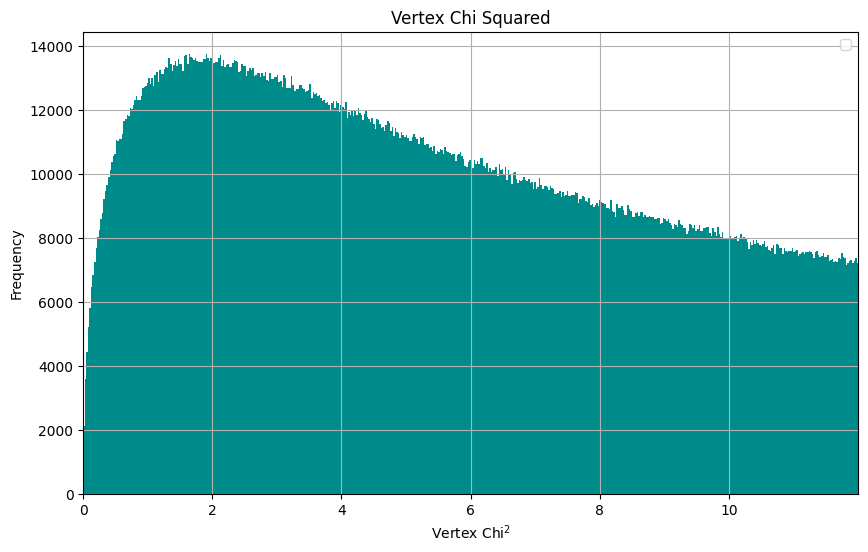

In [97]:
B_VertexChi2 = Events["B_VertexChi2"].array()
H1_ProbK=Events['H1_ProbK'].array()
H1_ProbPi=Events['H1_ProbPi'].array()
H2_ProbK=Events['H2_ProbK'].array()
H2_ProbPi=Events['H2_ProbPi'].array()
H3_ProbK=Events['H3_ProbK'].array()
H3_ProbPi=Events['H3_ProbPi'].array()



plt.figure(figsize=(10, 6))
plt.hist(H1_ProbK, bins=np.linspace(0, 1, 150), alpha=0.6, color='blue', label='H1_ProbK', density=False)
plt.hist(H2_ProbK, bins=np.linspace(0, 1, 150), alpha=0.4, color='red', label='H2_ProbK', density=False)
plt.hist(H3_ProbK, bins=np.linspace(0, 1, 150), alpha=0.2, color='green', label='H3_ProbK', density=False)
plt.title('H1, H2, and H3 Kaon Likelyhood')
plt.xlabel('Kaon Likelyhood')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 1)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=np.linspace(0, 1, 150), alpha=0.6, color='blue', label='H1_ProbPi', density=False)
plt.hist(H2_ProbPi, bins=np.linspace(0, 1, 150), alpha=0.4, color='red', label='H2_ProbPi', density=False)
plt.hist(H3_ProbPi, bins=np.linspace(0, 1, 150), alpha=0.2, color='green', label='H3_ProbPi', density=False)
plt.title('H1, H2, and H3 Pion Likelyhood')
plt.xlabel('Pion Likelyhood')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 1)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(B_VertexChi2, bins=500, color='darkcyan')
plt.title('Vertex Chi Squared')
plt.xlabel('Vertex Chi$^2$')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, max(B_VertexChi2))
plt.legend()
plt.show()

Using these plots, we can now think about making a preselection. This has some format like the below:

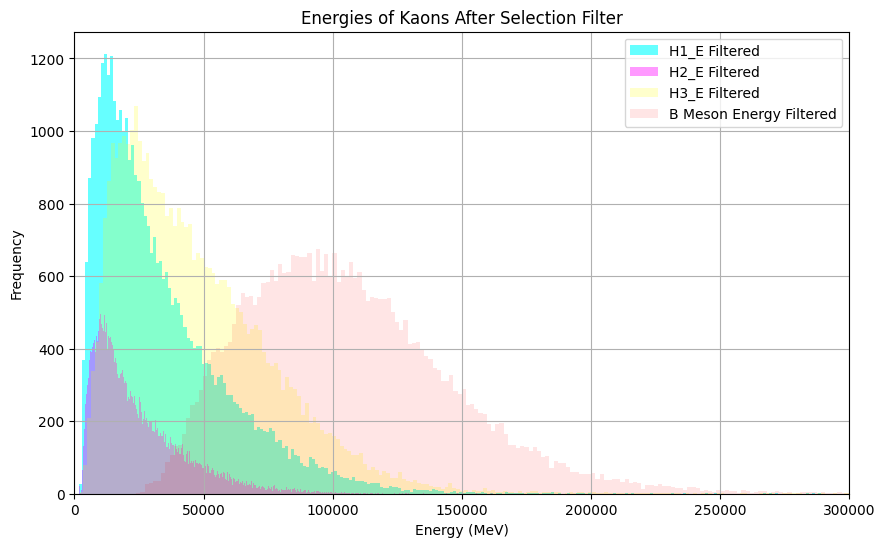

In [ ]:
#I am making the selection system to filter out anything that is not a Muon, and that has a higher probability of being a Kaon over a Pion
selected_events = ((branches['H1_ProbPi'] < branches['H1_ProbK']) &
				   (branches['H2_ProbPi'] < branches['H2_ProbK']) &
				   (branches['H3_ProbPi'] < branches['H3_ProbK']) &
					(branches['H1_isMuon'] != 1) &
					(branches['H2_isMuon'] != 1) &
					(branches['H3_isMuon'] != 1))




#just plotting the energies of the Kaons after the filter
plt.figure(figsize=(10, 6))
plt.hist(H1_E[selected_events], bins=500, color='cyan', alpha=0.6, label='H1_E Filtered')
plt.hist(H2_E[selected_events], bins=500, color='magenta', alpha=0.4, label='H2_E Filtered')
plt.hist(H3_E[selected_events], bins=500, color='yellow', alpha=0.2, label='H3_E Filtered')
plt.hist(B_E[selected_events], bins=500, color='r', alpha=0.1, label='B Meson Energy Filtered')
plt.title('Energies of Kaons After Selection Filter')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 300000)
plt.legend()
plt.show()




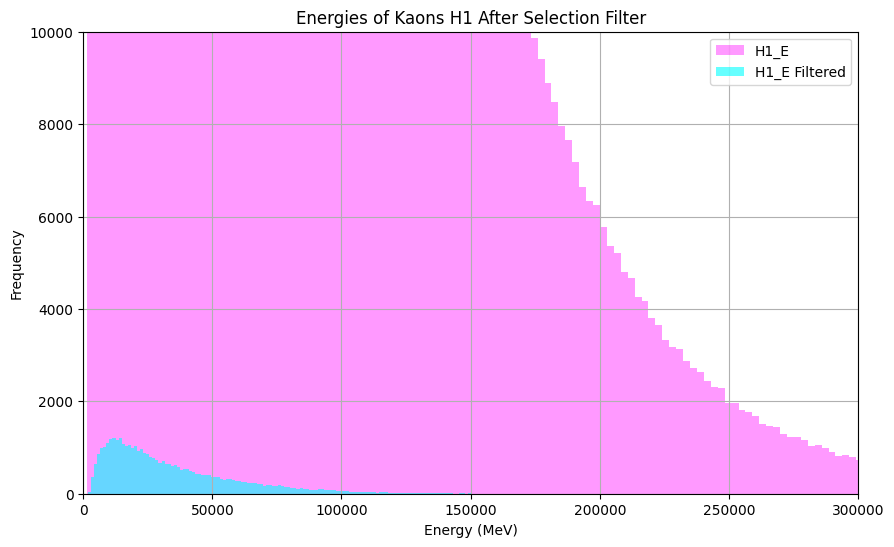

In [99]:
plt.figure(figsize=(10, 6))

plt.hist(H1_E, bins=5000, color='magenta', alpha=0.4, label='H1_E')
plt.hist(H1_E[selected_events], bins=500, color='cyan', alpha=0.6, label='H1_E Filtered')
plt.title('Energies of Kaons H1 After Selection Filter')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 300000)
plt.ylim(0, 10000)
plt.legend()
plt.show()


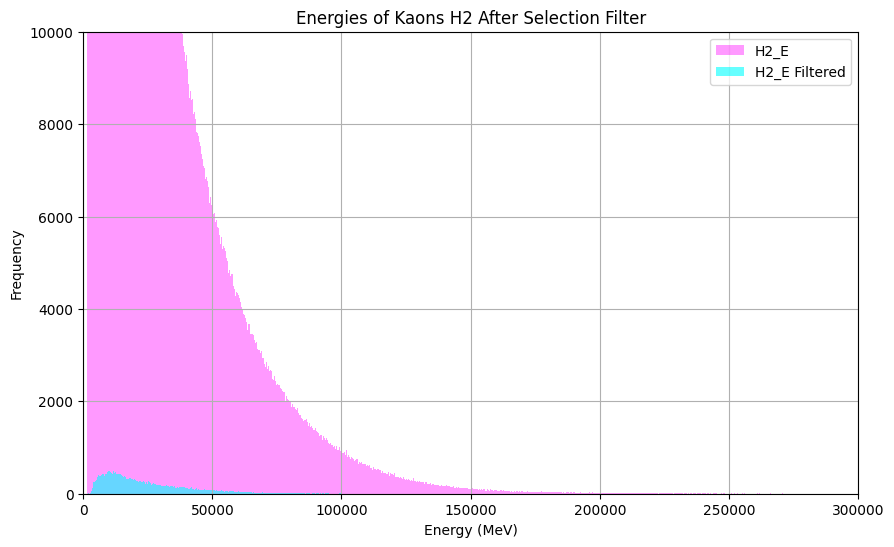

In [100]:
plt.figure(figsize=(10, 6))

plt.hist(H2_E, bins=5000, color='magenta', alpha=0.4, label='H2_E')
plt.hist(H2_E[selected_events], bins=500, color='cyan', alpha=0.6, label='H2_E Filtered')
plt.title('Energies of Kaons H2 After Selection Filter')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 300000)
plt.ylim(0, 10000)
plt.legend()
plt.show()


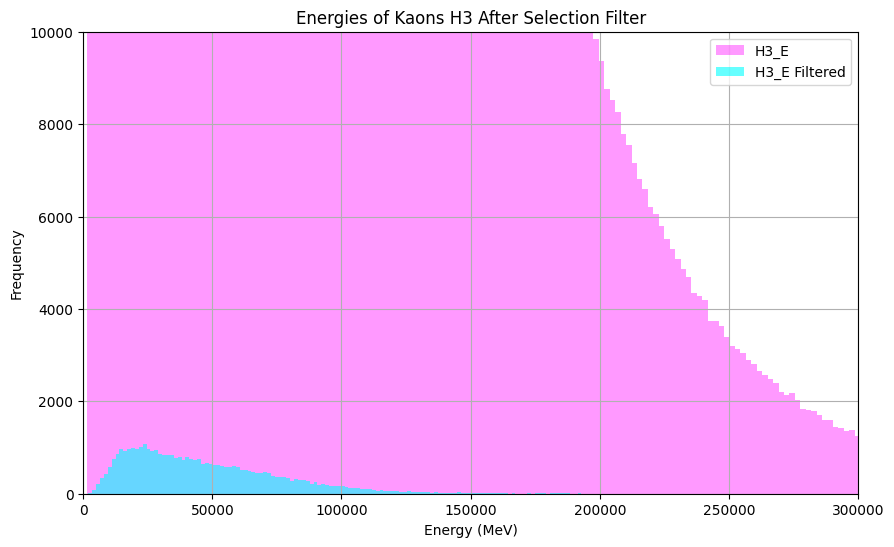

In [101]:
plt.figure(figsize=(10, 6))

plt.hist(H3_E, bins=5000, color='magenta', alpha=0.4, label='H3_E')
plt.hist(H3_E[selected_events], bins=500, color='cyan', alpha=0.6, label='H3_E Filtered')
plt.title('Energies of Kaons H3 After Selection Filter')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 300000)
plt.ylim(0, 10000)
plt.legend()
plt.show()


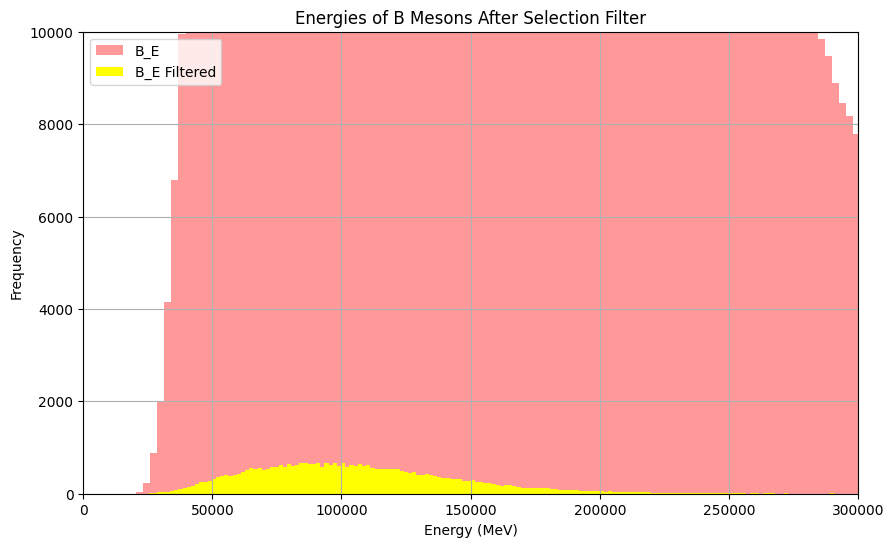

In [102]:
plt.figure(figsize=(10, 6))

plt.hist(B_E, bins=5000, color='r', alpha=0.4, label='B_E')
plt.hist(B_E[selected_events], bins=500, color='yellow', label='B_E Filtered')
plt.title('Energies of B Mesons After Selection Filter')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 300000)
plt.ylim(0, 10000)
plt.legend()
plt.show()


38744
5135823
The percentage of events that pass the selection is:  0.7543873688793403 %


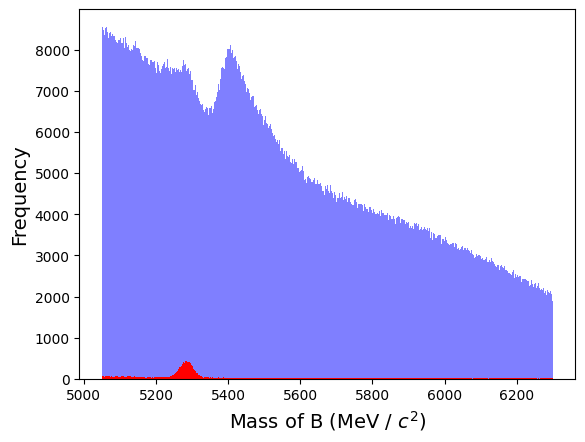

In [103]:
plt.figure();

plt.hist (MassB , bins=1000 , color='b', alpha = 0.5, label='Unfiltered');
plt.hist (MassB[selected_events] , bins=1000 , color='r', label='Filtered');
plt.xlabel('Mass of B (MeV / $c^2$)', fontsize=14);
plt.ylabel('Frequency', fontsize=14);

print(len(MassB[selected_events]))
print(len(MassB))
print('The percentage of events that pass the selection is: ', len(MassB[selected_events])/len(MassB)*100, '%')


*ADDED BY STUDENT: * The filtering selection looks to be working very well (I hope not too well). The Mass of the B meson is about 5280 MEV/c^2. This is close to the Wikipedia mass that is 5279.6 MEV/c^2. 

In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

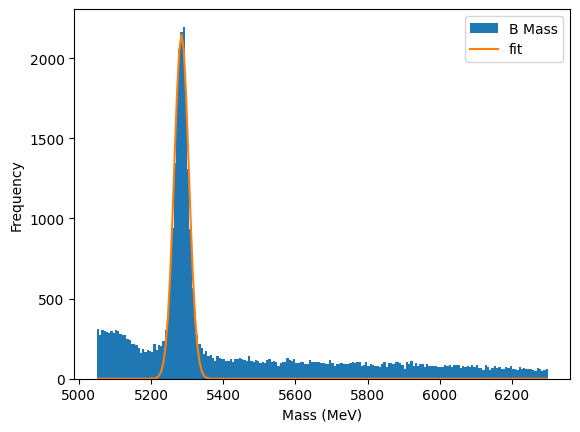

In [105]:
from scipy.optimize import curve_fit



# Plot the histogram and extract bin heights and edges
bin_height, bin_edge, _ = plt.hist(MassB[selected_events], 
                                   bins=200, 
                                   range=(min(MassB[selected_events]), max(MassB[selected_events])), 
                                   label="B Mass")

# Calculate bin centers
xdata = 0.5 * (bin_edge[1:] + bin_edge[:-1])
ydata = bin_height

# Define the Gaussian function
def gauss(x, *p):
    A, mu, sigma = p
    return A * np.exp(-((x - mu)**2) / (2. * sigma**2))

# Fit the Gaussian to the histogram data
Gauss_optimisedParameters, pcov = curve_fit(gauss, xdata, ydata, p0=[2, 2200, 10000])

# Generate the fitted curve using the bin centers
yfit = gauss(xdata, *Gauss_optimisedParameters)

# Overlay the fitted curve on the histogram
plt.plot(xdata, yfit, label='fit')
plt.xlabel("Mass (MeV)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.legend()
plt.show()


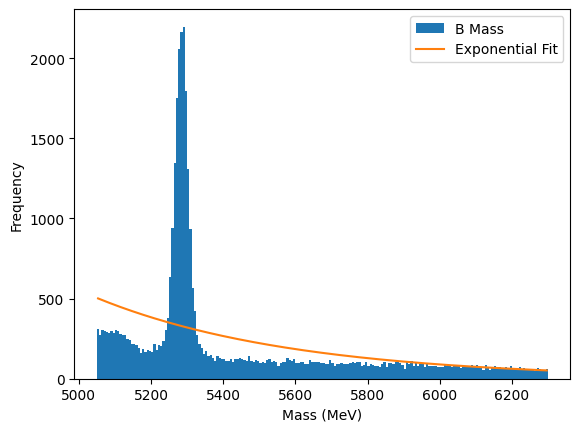

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Create the histogram
bin_height, bin_edge, _ = plt.hist(MassB[selected_events], 
                                   bins=200, 
                                   range=(min(MassB[selected_events]), max(MassB[selected_events])), 
                                   label="B Mass")

# Calculate bin centers
xdata = 0.5 * (bin_edge[1:] + bin_edge[:-1])
ydata = bin_height

# Define the exponential function
def expo(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential to the histogram data
# Adjust p0 as needed; here we start with A as the maximum count and B negative if expecting decay.
optimisedParameters, pcov = curve_fit(expo, xdata, ydata, p0=[max(ydata), -0.5e-3])

# Generate the fitted curve using the bin centers
yfit = expo(xdata, *optimisedParameters)

# Overlay the fitted curve on the histogram
plt.plot(xdata, yfit, label='Exponential Fit')
plt.xlabel("Mass (MeV)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.legend()
plt.show()


C:\Users\merov\AppData\Local\Temp\ipykernel_28056\1238597511.py:42: RuntimeWarning: overflow encountered in exp
  return A_e * np.exp(B_e * x)


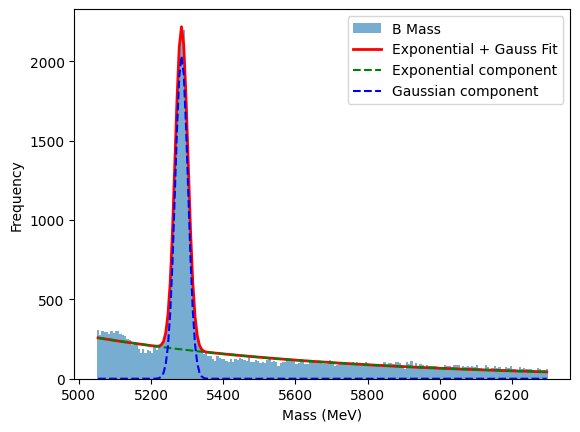

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ------------------------------------------------------
# Example Data (replace this with your actual data)
# ------------------------------------------------------
# Suppose you have an array 'MassB' of mass measurements
# and a boolean array 'selected_events' to pick your data.
# For demonstration, let's just make something up:
#   MassB = np.random.normal(loc=5280, scale=15, size=100000)
#   selected_events = np.ones_like(MassB, dtype=bool)
# In your real code, comment out or remove this section.
"""
import numpy as np
MassB = np.random.normal(loc=5280, scale=15, size=100000)
selected_events = np.ones_like(MassB, dtype=bool)
"""

# ------------------------------------------------------
# Create the histogram
# ------------------------------------------------------
bin_height, bin_edge, _ = plt.hist(
    MassB[selected_events],
    bins=200,
    range=(min(MassB[selected_events]), max(MassB[selected_events])),
    label="B Mass"
)

# Calculate bin centers (xdata) and the corresponding bin counts (ydata)
xdata = 0.5 * (bin_edge[1:] + bin_edge[:-1])
ydata = bin_height

# ------------------------------------------------------
# Define separate functions
# ------------------------------------------------------
def expo(x, A_e, B_e):
    """
    Exponential function:
        f(x) = A_e * exp(B_e * x)
    """
    return A_e * np.exp(B_e * x)

def gauss(x, A_g, mu_g, sigma_g):
    """
    Gaussian function:
        g(x) = A_g * exp(-(x - mu_g)^2 / (2 * sigma_g^2))
    """
    return A_g * np.exp(-((x - mu_g)**2) / (2. * sigma_g**2))

# Combine them into one function
def exp_plus_gauss(x, A_e, B_e, A_g, mu_g, sigma_g):
    """
    Combined model: exponential + Gaussian
    """
    return expo(x, A_e, B_e) + gauss(x, A_g, mu_g, sigma_g)

# ------------------------------------------------------
# Fit the combined function to the histogram data
# ------------------------------------------------------
# p0: initial guesses for [A_e, B_e, A_g, mu_g, sigma_g]
# Adjust these based on your data and known peak position
p0 = [
    200,    # A_e (background amplitude guess)
    -2e-3,  # B_e (background slope guess, negative for decreasing)
    2000,   # A_g (peak amplitude guess)
    5280,   # mu_g (peak center guess, e.g. B meson ~ 5280 MeV)
    20      # sigma_g (peak width guess)
]

optimisedParameters, pcov = curve_fit(exp_plus_gauss, xdata, ydata, p0=p0)

# Extract best-fit parameters for clarity
A_e_opt, B_e_opt, A_g_opt, mu_g_opt, sigma_g_opt = optimisedParameters

# ------------------------------------------------------
# Generate fitted curves
# ------------------------------------------------------
yfit_total = exp_plus_gauss(xdata, *optimisedParameters)   # total (expo + gauss)
yfit_exp   = expo(xdata, A_e_opt, B_e_opt)                 # just exponential
yfit_gauss = gauss(xdata, A_g_opt, mu_g_opt, sigma_g_opt)  # just Gaussian

# ------------------------------------------------------
# Plot the results
# ------------------------------------------------------
plt.clf()  # Clear the current figure (optional)

# Re-plot the histogram
plt.hist(MassB[selected_events],
         bins=200,
         range=(min(MassB[selected_events]), max(MassB[selected_events])),
         label="B Mass",
         alpha=0.6)  # alpha=0.6 for transparency

# Plot the total fit
plt.plot(xdata, yfit_total, 'r-', label='Exponential + Gauss Fit', linewidth=2)

# Optionally plot individual components (dashed lines)
plt.plot(xdata, yfit_exp, 'g--', label='Exponential component')
plt.plot(xdata, yfit_gauss, 'b--', label='Gaussian component')

plt.xlabel("Mass (MeV)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.legend()
plt.show()


ADDED BY STUDENT: The exp + gauss fits pretty well but is not perfect, as seen right before and after the bell curve where the data is lower than the curve.

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

C:\Users\merov\AppData\Local\Temp\ipykernel_28056\1481920672.py:7: RuntimeWarning: overflow encountered in exp
  return A_e * np.exp(B_e * x)
C:\Users\merov\AppData\Local\Temp\ipykernel_28056\1481920672.py:78: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_total = np.trapz(yfit_total, xdata)


For $B^-$:
Fitted parameters: [ 6.33481628e+04 -1.24464963e-03  1.07588145e+03  5.28367749e+03
  1.80669524e+01]
Parameter uncertainties: [1.57121583e+04 4.45932941e-05 2.48429809e+01 3.67903386e-01
 3.13856554e-01]
Reduced chi-squared: 2.2821137708274377
For $B^+$:
Fitted parameters: [ 5.46652587e+04 -1.22886370e-03  9.58720827e+02  5.28531203e+03
  1.76953012e+01]
Parameter uncertainties: [1.41157245e+04 4.64206926e-05 2.41337403e+01 3.91629866e-01
 3.38160314e-01]
Reduced chi-squared: 2.334074163659218


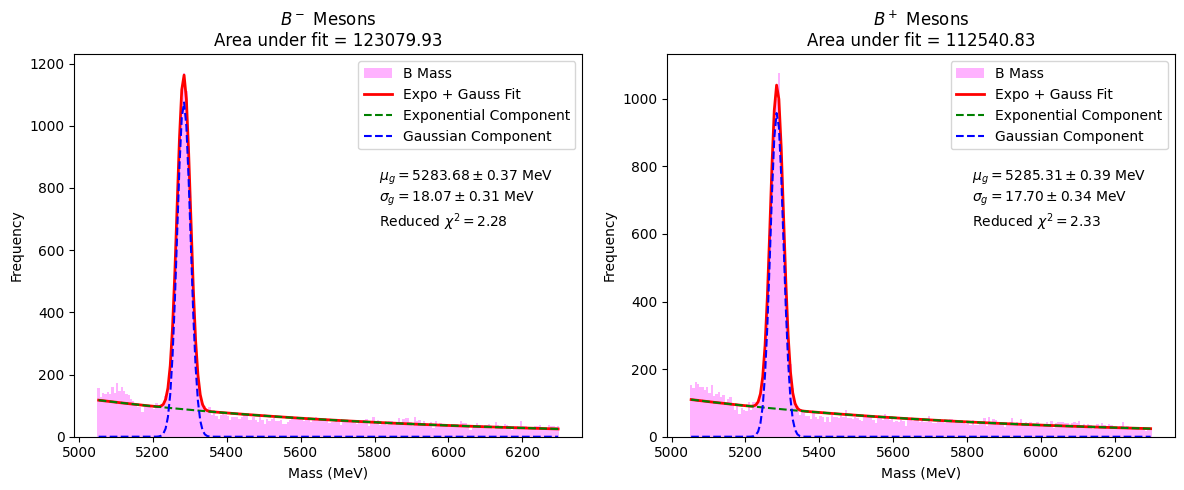


Percent difference between B^- and B^+ meson areas: 8.95%


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the exponential and Gaussian functions
def expo(x, A_e, B_e):
    return A_e * np.exp(B_e * x)

def gauss(x, A_g, mu_g, sigma_g):
    return A_g * np.exp(-(x - mu_g)**2 / (2 * sigma_g**2))

def exp_plus_gauss(x, A_e, B_e, A_g, mu_g, sigma_g):
    return expo(x, A_e, B_e) + gauss(x, A_g, mu_g, sigma_g)

# This si the new filter for the charge 
ChargeNegative = ((branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] == 1) &
                  (branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] != 0))

ChargePositive = ((branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] == -1) &
                  (branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] != 0))

#this is just adding the charge filter to the selected events
mask_negative = selected_events & ChargeNegative
mask_positive = selected_events & ChargePositive

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Variables to store areas
area_negative = None
area_positive = None

for ax, mask, charge_label in zip(axs, [mask_negative, mask_positive], ["$B^-$", "$B^+$"]):
    data = MassB[mask]
    
    # Ensure we have enough data to fit
    if len(data) == 0:
        ax.text(0.5, 0.5, 'No Data', transform=ax.transAxes, ha='center')
        ax.set_title(f"{charge_label} B Mesons")
        continue

    # Create histogram
    hist_counts, bin_edges, _ = ax.hist(data, bins=200, range=(min(data), max(data)),
                                        label="B Mass", color='magenta', alpha=0.3)
    
    # Calculate bin centers and use them as xdata for fitting
    xdata = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    ydata = hist_counts

    # Select bins with ydata > 0 for fitting
    mask_fit = ydata > 0
    xdata_fit = xdata[mask_fit]
    ydata_fit = ydata[mask_fit]
    sigma_fit = np.sqrt(ydata_fit)  # Uncertainties for fitting

    # Initial guess for fit parameters: [A_e, B_e, A_g, mu_g, sigma_g]
    p0 = [200, -2e-3, 2000, 5280, 20]

    try:
        # Perform weighted fit
        popt, pcov = curve_fit(exp_plus_gauss, xdata_fit, ydata_fit, p0=p0, sigma=sigma_fit)
        perr = np.sqrt(np.diag(pcov))  # Parameter uncertainties
        
        # Extract fitted parameters
        A_e_opt, B_e_opt, A_g_opt, mu_g_opt, sigma_g_opt = popt
        A_e_err, B_e_err, A_g_err, mu_g_err, sigma_g_err = perr
        
        # Compute chi-squared and reduced chi-squared
        yfit_fit = exp_plus_gauss(xdata_fit, *popt)
        chi2 = np.sum((ydata_fit - yfit_fit)**2 / ydata_fit)
        dof = len(xdata_fit) - len(popt)
        reduced_chi2 = chi2 / dof
        
        # Compute the fitted curves over the full xdata for plotting
        yfit_total = exp_plus_gauss(xdata, *popt)
        yfit_exp = expo(xdata, A_e_opt, B_e_opt)
        yfit_gauss = gauss(xdata, A_g_opt, mu_g_opt, sigma_g_opt)

        # Calculate area under the total fit curve
        area_total = np.trapz(yfit_total, xdata)

        # Store the area based on charge label
        if charge_label == "$B^-$":
            area_negative = area_total
        else:  # "$B^+$"
            area_positive = area_total

        # Plot the fitted curves
        ax.plot(xdata, yfit_total, 'r-', label='Expo + Gauss Fit', linewidth=2)
        ax.plot(xdata, yfit_exp, 'g--', label='Exponential Component')
        ax.plot(xdata, yfit_gauss, 'b--', label='Gaussian Component')

        # Add fitted parameters and uncertainties to the plot
        ax.text(0.6, 0.7, f"$\\mu_g = {mu_g_opt:.2f} \\pm {mu_g_err:.2f}$ MeV\n"
                            f"$\\sigma_g = {sigma_g_opt:.2f} \\pm {sigma_g_err:.2f}$ MeV\n"
                            f"Reduced $\\chi^2 = {reduced_chi2:.2f}$",
                transform=ax.transAxes, va='top', fontsize=10)

        # Print results for debugging or further analysis
        print(f"For {charge_label}:")
        print(f"Fitted parameters: {popt}")
        print(f"Parameter uncertainties: {perr}")
        print(f"Reduced chi-squared: {reduced_chi2}")
        
    except RuntimeError:
        ax.text(0.5, 0.5, 'Fit failed', transform=ax.transAxes, ha='center')
        ax.set_title(f"{charge_label} Mesons")
        continue

    ax.set_xlabel("Mass (MeV)")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.set_title(f"{charge_label} Mesons\nArea under fit = {area_total:.2f}")

plt.tight_layout()
plt.show()

# Calculate and print the percent difference between the areas
if area_negative is not None and area_positive is not None:
    percent_diff = np.abs(area_negative - area_positive) / ((area_negative + area_positive) / 2) * 100
    print(f"\nPercent difference between B^- and B^+ meson areas: {percent_diff:.2f}%")
else:
    print("\nUnable to calculate percent difference: one or both areas are None.")

We can see there seems to be an assymetry for the DOWN magnet direction: The percent difference of the two mesons is 8.95%...

Let's do all of this again for the UP magnet direction :(

This is to check that both magnets are equal and affect the kaons equally. If not, this might be why we see an assymetry in the B count.

I will do all of this in a the few next cells. Note that I will be copying alot of stuff from above, so the comments might be exactly the same.

In [110]:
#import the new file
f = uproot.open(r"C:\Users\merov\OneDrive\Desktop\VSCODE\Big_Data_Analysis\B2HHH_MagnetUp.root")

#format the data
f.keys()
data=f["DecayTree/H1_PX"].array()

Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot= np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()



H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()

H2_Ptot= np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)
H3_Ptot= np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)


PX=H1_PX+H2_PX+H3_PX 
PY=H1_PY+H2_PY+H3_PY
PZ=H1_PZ+H2_PZ+H3_PZ
B_Ptot= np.sqrt(PX**2 + PY**2 + PZ**2)

branches=Events.arrays()
branches_dictionary=branches.tolist()

H1_E=np.sqrt(H1_Ptot**2+493.7**2)
H2_E=np.sqrt(H2_Ptot**2+493.7**2)
H3_E=np.sqrt(H3_Ptot**2+493.7**2)

B_E=H1_E+H2_E+H3_E

MassB=np.sqrt(B_E**2-B_Ptot**2)

B_VertexChi2 = Events["B_VertexChi2"].array()
H1_ProbK=Events['H1_ProbK'].array()
H1_ProbPi=Events['H1_ProbPi'].array()
H2_ProbK=Events['H2_ProbK'].array()
H2_ProbPi=Events['H2_ProbPi'].array()
H3_ProbK=Events['H3_ProbK'].array()
H3_ProbPi=Events['H3_ProbPi'].array()


C:\Users\merov\AppData\Local\Temp\ipykernel_28056\3773545565.py:14: RuntimeWarning: overflow encountered in exp
  return A_e * np.exp(B_e * x)
C:\Users\merov\AppData\Local\Temp\ipykernel_28056\3773545565.py:85: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_total = np.trapz(yfit_total, xdata)


For $B^-$:
Fitted parameters: [ 7.07667840e+04 -1.34715710e-03  7.71470019e+02  5.28552623e+03
  1.75694088e+01]
Parameter uncertainties: [2.05971614e+04 5.24763582e-05 1.98926043e+01 3.91463829e-01
 3.38531543e-01]
Reduced chi-squared: 1.9714431733208275
For $B^+$:
Fitted parameters: [ 1.50472007e+05 -1.49518439e-03  7.02400535e+02  5.28394667e+03
  1.75889559e+01]
Parameter uncertainties: [4.86762180e+04 5.85043753e-05 2.00894114e+01 4.40837434e-01
 3.77971380e-01]
Reduced chi-squared: 2.219582304849733


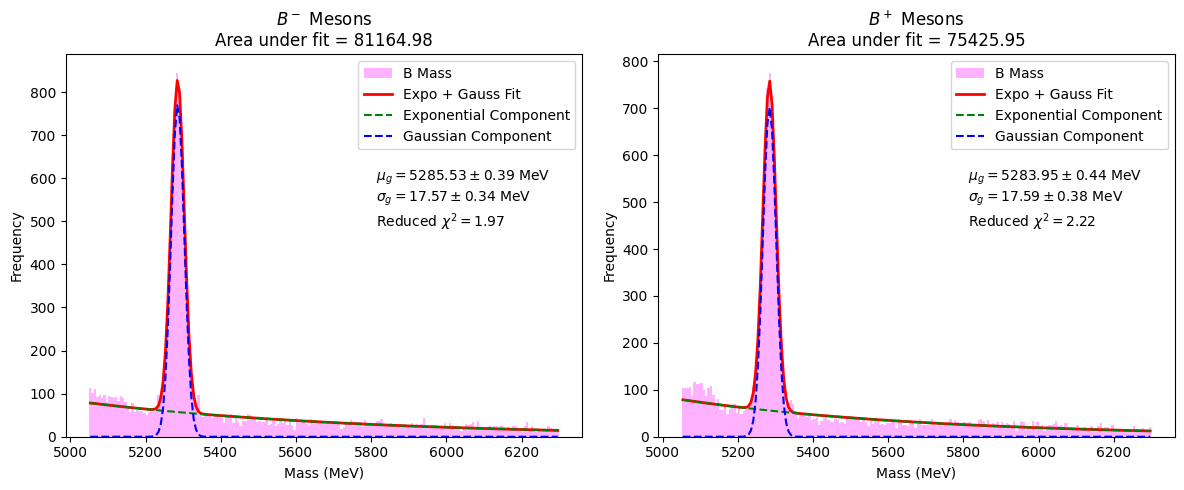


Percent difference between B^- and B^+ meson areas: 7.33%


In [113]:
#define the selection filter
selected_events = ((branches['H1_ProbPi'] < branches['H1_ProbK']) &
				   (branches['H2_ProbPi'] < branches['H2_ProbK']) &
				   (branches['H3_ProbPi'] < branches['H3_ProbK']) &
					(branches['H1_isMuon'] != 1) &
					(branches['H2_isMuon'] != 1) &
					(branches['H3_isMuon'] != 1))




# Define the exponential and Gaussian functions
def expo(x, A_e, B_e):
    return A_e * np.exp(B_e * x)

def gauss(x, A_g, mu_g, sigma_g):
    return A_g * np.exp(-(x - mu_g)**2 / (2 * sigma_g**2))

def exp_plus_gauss(x, A_e, B_e, A_g, mu_g, sigma_g):
    return expo(x, A_e, B_e) + gauss(x, A_g, mu_g, sigma_g)

# Assume branches, selected_events, and MassB are defined
ChargeNegative = ((branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] == 1) &
                  (branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] != 0))

ChargePositive = ((branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] == -1) &
                  (branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] != 0))

mask_negative = selected_events & ChargeNegative
mask_positive = selected_events & ChargePositive

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Variables to store areas
area_negative = None
area_positive = None

for ax, mask, charge_label in zip(axs, [mask_negative, mask_positive], ["$B^-$", "$B^+$"]):
    data = MassB[mask]
    
    # Ensure we have enough data to fit
    if len(data) == 0:
        ax.text(0.5, 0.5, 'No Data', transform=ax.transAxes, ha='center')
        ax.set_title(f"{charge_label} B Mesons")
        continue

    # Create histogram
    hist_counts, bin_edges, _ = ax.hist(data, bins=200, range=(min(data), max(data)),
                                        label="B Mass", color='magenta', alpha=0.3)
    
    # Calculate bin centers and use them as xdata for fitting
    xdata = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    ydata = hist_counts

    # Select bins with ydata > 0 for fitting
    mask_fit = ydata > 0
    xdata_fit = xdata[mask_fit]
    ydata_fit = ydata[mask_fit]
    sigma_fit = np.sqrt(ydata_fit)  # Uncertainties for fitting

    # Initial guess for fit parameters: [A_e, B_e, A_g, mu_g, sigma_g]
    p0 = [200, -2e-3, 2000, 5280, 20]

    try:
        # Perform weighted fit
        popt, pcov = curve_fit(exp_plus_gauss, xdata_fit, ydata_fit, p0=p0, sigma=sigma_fit)
        perr = np.sqrt(np.diag(pcov))  # Parameter uncertainties
        
        # Extract fitted parameters
        A_e_opt, B_e_opt, A_g_opt, mu_g_opt, sigma_g_opt = popt
        A_e_err, B_e_err, A_g_err, mu_g_err, sigma_g_err = perr
        
        # Compute chi-squared and reduced chi-squared
        yfit_fit = exp_plus_gauss(xdata_fit, *popt)
        chi2 = np.sum((ydata_fit - yfit_fit)**2 / ydata_fit)
        dof = len(xdata_fit) - len(popt)
        reduced_chi2 = chi2 / dof
        
        # Compute the fitted curves over the full xdata for plotting
        yfit_total = exp_plus_gauss(xdata, *popt)
        yfit_exp = expo(xdata, A_e_opt, B_e_opt)
        yfit_gauss = gauss(xdata, A_g_opt, mu_g_opt, sigma_g_opt)

        # Calculate area under the total fit curve
        area_total = np.trapz(yfit_total, xdata)

        # Store the area based on charge label
        if charge_label == "$B^-$":
            area_negative = area_total
        else:  # "$B^+$"
            area_positive = area_total

        # Plot the fitted curves
        ax.plot(xdata, yfit_total, 'r-', label='Expo + Gauss Fit', linewidth=2)
        ax.plot(xdata, yfit_exp, 'g--', label='Exponential Component')
        ax.plot(xdata, yfit_gauss, 'b--', label='Gaussian Component')

        # Add fitted parameters and uncertainties to the plot
        ax.text(0.6, 0.7, f"$\\mu_g = {mu_g_opt:.2f} \\pm {mu_g_err:.2f}$ MeV\n"
                            f"$\\sigma_g = {sigma_g_opt:.2f} \\pm {sigma_g_err:.2f}$ MeV\n"
                            f"Reduced $\\chi^2 = {reduced_chi2:.2f}$",
                transform=ax.transAxes, va='top', fontsize=10)

        # Print results for debugging or further analysis
        print(f"For {charge_label}:")
        print(f"Fitted parameters: {popt}")
        print(f"Parameter uncertainties: {perr}")
        print(f"Reduced chi-squared: {reduced_chi2}")
        
    except RuntimeError:
        ax.text(0.5, 0.5, 'Fit failed', transform=ax.transAxes, ha='center')
        ax.set_title(f"{charge_label} Mesons")
        continue

    ax.set_xlabel("Mass (MeV)")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.set_title(f"{charge_label} Mesons\nArea under fit = {area_total:.2f}")

plt.tight_layout()
plt.show()

# Calculate and print the percent difference between the areas
if area_negative is not None and area_positive is not None:
    percent_diff = np.abs(area_negative - area_positive) / ((area_negative + area_positive) / 2) * 100
    print(f"\nPercent difference between B^- and B^+ meson areas: {percent_diff:.2f}%")
else:
    print("\nUnable to calculate percent difference: one or both areas are None.")

Okay so, this is quite significant!
Now the percent difference of the two mesons is 7.33%...

This is similar to the previous difference of 8.95%. This might indicate that there is a ~1.5ish percent difference in the magnet. But, other than that there seems to be a very noticeable assymetry of about ~7ish percent in Beta production at the collision point at LHCb. I dont know if this is evidence of CP violation, as I am not sure how large our data sample is, and the collisions at LHC might not be the exact same conditions as in the early universe when these particles decoupled.

The following is just me being curious about the number of events per file.

In [ ]:

n_events = f["DecayTree"].num_entries
print("The total number of events in the file is:", n_events)

The total number of events in the file is: 3420295


# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)